In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
import imblearn 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('.\heart_2020_cleaned.csv')
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [3]:
replace_map = {'HeartDisease':{'Yes':1,'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Smoking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'AlcoholDrinking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Stroke':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'DiffWalking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Sex':{'Female':1, 'Male':0}}
df.replace(replace_map,inplace=True)

replace_map = {'AgeCategory':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}
df.replace(replace_map,inplace=True)

#Is white || is black || is Asian ||is American Indian/Alaskan Native || is Hispanic || is Other
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df=pd.DataFrame(encoder.fit_transform(df[['Race','Diabetic']]).toarray())
encoder_df.columns=['Race0','Race1','Race2','Race3','Race4','Race5','NotDiabetic','Diabetic during pregnancy','Borderline diabetes','IsDiabetic']
df=df.join(encoder_df)


'''

replace_map = {'White':1, 'Black':0,'Asian':0,'American Indian/Alaskan Native':0,'Hispanic':0,'Other':0}
df['isWhite']=df['Race']
df['isWhite'].replace(replace_map,inplace=True)

replace_map = {'White':0, 'Black':1,'Asian':0,'American Indian/Alaskan Native':0,'Hispanic':0,'Other':0}
df['isBlack']=df['Race']
df['isBlack'].replace(replace_map,inplace=True)

replace_map = {'White':0, 'Black':0,'Asian':1,'American Indian/Alaskan Native':0,'Hispanic':0,'Other':0}
df['isAsian']=df['Race']
df['isAsian'].replace(replace_map,inplace=True)

replace_map = {'White':0, 'Black':0,'Asian':0,'American Indian/Alaskan Native':1,'Hispanic':0,'Other':0}
df['isAmerican']=df['Race']
df['isAmerican'].replace(replace_map,inplace=True)

replace_map = {'White':0, 'Black':0,'Asian':0,'American Indian/Alaskan Native':0,'Hispanic':1,'Other':0}
df['isHispanic']=df['Race']
df['isHispanic'].replace(replace_map,inplace=True)

replace_map = {'White':0, 'Black':0,'Asian':0,'American Indian/Alaskan Native':0,'Hispanic':0,'Other':1}
df['isOther']=df['Race']
df['isOther'].replace(replace_map,inplace=True)


encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df=pd.DataFrame(encoder.fit_transform(df[['Diabetic']]).toarray())
encoder_df.columns=['NotDiabetic','Diabetic during pregnancy','Borderline diabetes','IsDiabetic']
df=df.join(encoder_df)
'''

replace_map = {'Diabetic':{'No':0,'Yes (during pregnancy)':1,'No, borderline diabetes':2,'Yes':3}}
df.replace(replace_map,inplace=True)

replace_map = {'PhysicalActivity':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'GenHealth':{'Very good':0, 'Fair':1,'Good':2,'Poor':3,'Excellent':4}}
df.replace(replace_map,inplace=True)

replace_map = {'Asthma':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'KidneyDisease':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'SkinCancer':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)



df=df.drop(['Race','Diabetic'],axis=1)

scaler_df= MinMaxScaler(feature_range=(0,1)).fit(df)
df= pd.DataFrame(scaler_df.transform(df[df.columns]),columns=df.columns)
df.columns



Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race0', 'Race1', 'Race2', 'Race3', 'Race4', 'Race5',
       'NotDiabetic', 'Diabetic during pregnancy', 'Borderline diabetes',
       'IsDiabetic'],
      dtype='object')

# Correlation matrix

                           HeartDisease       BMI   Smoking  AlcoholDrinking  \
HeartDisease                   1.000000  0.051803  0.107764        -0.032080   
BMI                            0.051803  1.000000  0.023118        -0.038816   
Smoking                        0.107764  0.023118  1.000000         0.111768   
AlcoholDrinking               -0.032080 -0.038816  0.111768         1.000000   
Stroke                         0.196835  0.019733  0.061226        -0.019858   
PhysicalHealth                 0.170721  0.109788  0.115352        -0.017254   
MentalHealth                   0.028591  0.064131  0.085157         0.051282   
DiffWalking                    0.201258  0.181678  0.120074        -0.035328   
Sex                           -0.070040 -0.026940 -0.085052        -0.004200   
AgeCategory                    0.233432 -0.004744  0.128331        -0.059528   
PhysicalActivity              -0.100030 -0.150616 -0.097174         0.017487   
GenHealth                     -0.007015 

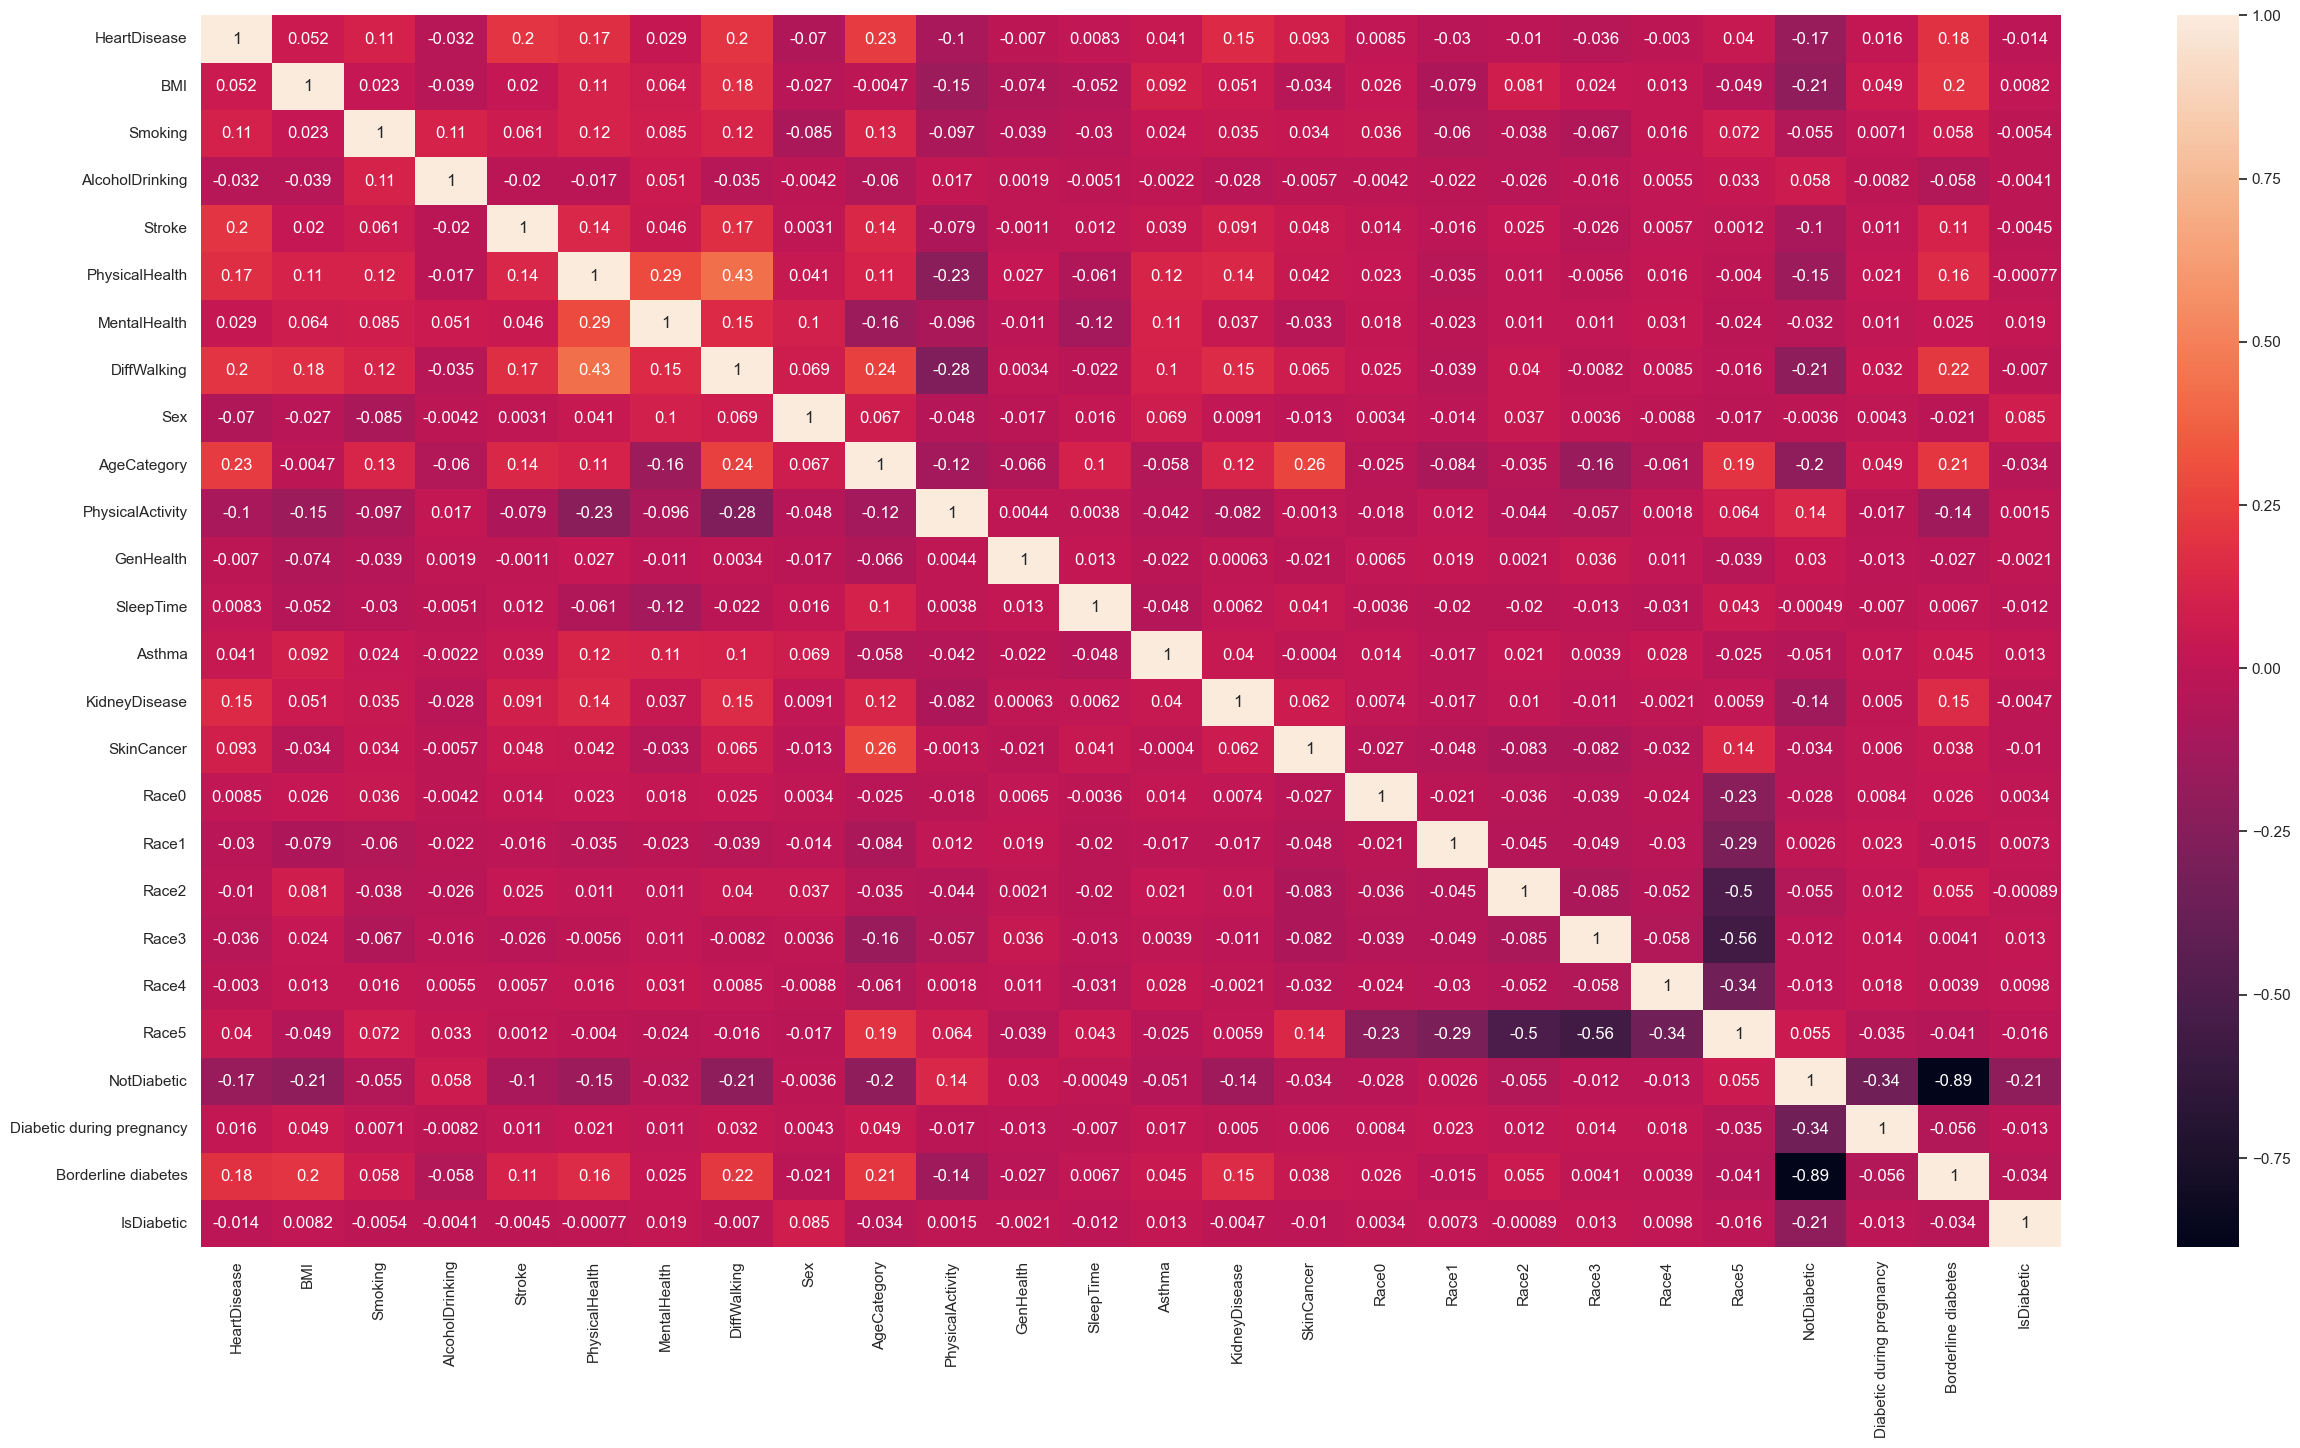

In [5]:
matrix = df.corr()
sns.set(rc={'figure.figsize':(30,16)})
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=13122001)

# SMOTE

In [ ]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_train.drop('HeartDisease', axis=1), df_train['HeartDisease'])
df_train = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
print(df_train['HeartDisease'].value_counts())
df_train

In [ ]:

#create two different dataframe of majority and minority class
df_majority = df_train[(df['HeartDisease']==0)]
df_minority = df_train[(df['HeartDisease']==1)]
#upsample minority class
df_minority_upsampled = resample(df_minority,
                               replace=True,
                               n_samples=204599,
                               random_state=13122001)
#combine majority class with upsampled minority class
df_train=pd.concat([df_minority_upsampled,df_majority])
df_train

In [ ]:
X_train=df_train.drop(['HeartDisease'],axis=1)
y_train=df_train['HeartDisease'].to_frame()
X_test=df_test.drop(['HeartDisease'],axis=1)
y_test=df_test['HeartDisease'].to_frame()
X_train.to_csv('.\X_train.csv')
y_train.to_csv('.\y_train.csv')
X_test.to_csv('.\X_test.csv')
y_test.to_csv('.\y_test.csv')
df.to_csv('.\df.csv')

In [ ]:
print(df_test['HeartDisease'].value_counts())